# Exploring Gun Deaths in the US

The dataset contains information on gun deaths in the US from 2012 to 2014. Each row in the dataset represents a single fatality. The columns contain demographic and other information about the victim. To download it, [click here](full_data.csv).

The columns of the datasets are self-explanatory, however few need to clarified:
* police: 0 or 1 (0 means no police were involved)
* intent: value could be Suicide, Accidental, NA, Homicide, or Undetermined
* race: value could be Asian/Pacific Islander, Native American/Native Alaskan, Black, Hispanic, or White
* education: 
    1 -- Less than High School
    2 -- Graduated from High School or equivalent
    3 -- Some College
    4 -- At least graduated from College
    5 -- Not available
    
We'll be using another dataset called "census.csv" which has one row consists of population counts. To download it, [click here](census.csv)

---
#### Reading the dataset and show sample data

In [1]:
import csv

file = csv.reader(open("full_data.csv"))

data = list(file)

print(data[0]) # print header

data = data[1:] # skip the header

p = [print(line) for line in data[:5]] # sample data. pretty way of printing each element on a seperate line

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4']
['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3']
['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4']
['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']
['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']


---
#### Counting Gun Deaths By Year

In [2]:
years = [year[1] for year in data]

year_counts = {}

for year in years:
    if year not in year_counts:
        year_counts[year] = 1
    else:
        year_counts[year] += 1

p = [print(k,":",v) for k,v in year_counts.items()]

2013 : 33636
2012 : 33563
2014 : 33599


---
#### Exploring Gun Deaths By Month And Year

In [3]:
import datetime

dates = [datetime.datetime(year=int(date[1]),month=int(date[2]),day=1) for date in data]

date_counts = {}

for date in dates:
    if date not in date_counts:
        date_counts[date] = 1
    else:
        date_counts[date] += 1
        

p = [print(str(k).split(" ")[0],": ",v) for k,v in sorted(date_counts.items())]

2012-01-01 :  2758
2012-02-01 :  2357
2012-03-01 :  2743
2012-04-01 :  2795
2012-05-01 :  2999
2012-06-01 :  2826
2012-07-01 :  3026
2012-08-01 :  2954
2012-09-01 :  2852
2012-10-01 :  2733
2012-11-01 :  2729
2012-12-01 :  2791
2013-01-01 :  2864
2013-02-01 :  2375
2013-03-01 :  2862
2013-04-01 :  2798
2013-05-01 :  2806
2013-06-01 :  2920
2013-07-01 :  3079
2013-08-01 :  2859
2013-09-01 :  2742
2013-10-01 :  2808
2013-11-01 :  2758
2013-12-01 :  2765
2014-01-01 :  2651
2014-02-01 :  2361
2014-03-01 :  2684
2014-04-01 :  2862
2014-05-01 :  2864
2014-06-01 :  2931
2014-07-01 :  2884
2014-08-01 :  2970
2014-09-01 :  2914
2014-10-01 :  2865
2014-11-01 :  2756
2014-12-01 :  2857


---
#### Exploring Gun Deaths By Race And Sex

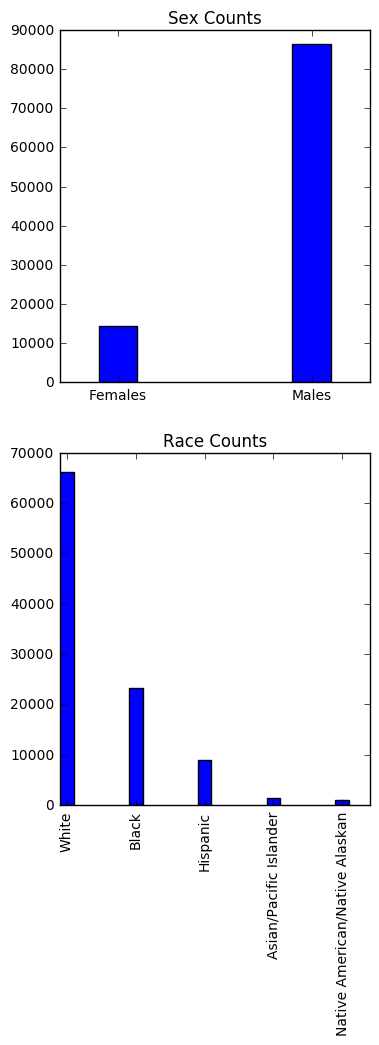

In [4]:
sex_counts = {}
race_counts = {}

for line in data:
    if line[5] not in sex_counts:
        sex_counts[line[5]] = 1
    else:
        sex_counts[line[5]] += 1
        
    if line[7] not in race_counts:
        race_counts[line[7]] = 1
    else:
        race_counts[line[7]] += 1  
        

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax1.bar(left=[1,2],height=sex_counts.values(),width=0.2)
ax1.set_xticks([i+0.2/2 for i in (1,2)])
ax1.set_xticklabels(['Females', 'Males'])
ax1.set_title("Sex Counts")

ax2.bar(left=list(range(1,len(race_counts)+1)),height=race_counts.values(),width=0.2)
ax2.set_xticks([i+0.2/2 for i in range(1,len(race_counts)+1)])
ax2.set_xticklabels(race_counts.keys(),rotation=90)
ax2.set_title("Race Counts")

plt.show()

---
#### Reading census dataset

In [5]:
census = list(csv.reader(open("census.csv")))

print(census[0])
census = census[1]
print(census)

["'Id'", " 'Year'", " 'Id'", " 'Sex'", " 'Id'", " 'Hispanic Origin'", " 'Id'", " 'Id2'", " 'Geography'", " 'Total'", " 'Race Alone - White'", " 'Race Alone - Hispanic'", " 'Race Alone - Black or African American'", " 'Race Alone - American Indian and Alaska Native'", " 'Race Alone - Asian'", " 'Race Alone - Native Hawaiian and Other Pacific Islander'", " 'Two or More Races'"]
["'cen42010'", " 'April 1", " 2010 Census'", " 'totsex'", " 'Both Sexes'", " 'tothisp'", " 'Total'", " '0100000US'", " ''", " 'United States'", " '308745538'", " '197318956'", " '44618105'", " '40250635'", " '3739506'", " '15159516'", " '674625'", " '6984195'"]


---
#### Computing Rates Of Gun Deaths Per Race

Rate of gun deaths per 100,000 people in each race.

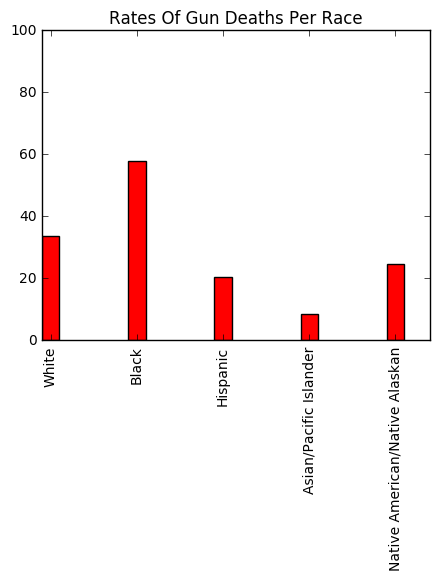

In [6]:
# manual mapping
mapping = {
    "Asian/Pacific Islander": 15159516 + 674625,
    "Native American/Native Alaskan": 3739506,
    "Black": 40250635,
    "Hispanic": 44618105,
    "White": 197318956
}

race_per_hundredk = {}

for k,v in race_counts.items():
    race_per_hundredk[k] = (v / mapping[k]) * 100000

fig = plt.figure(figsize=(5,4))

ax = fig.add_subplot(111)

ax.bar(left=list(range(1,len(race_per_hundredk)+1)),height=race_per_hundredk.values(),width=0.2,color='r')
ax.set_ylim(0,100) # 100%
ax.set_xticks([i+0.2/2 for i in range(1,len(race_per_hundredk)+1)])
ax.set_xticklabels(race_per_hundredk.keys(),rotation=90)
ax.set_title("Rates Of Gun Deaths Per Race")

plt.show()

---
#### Filtering By Intent

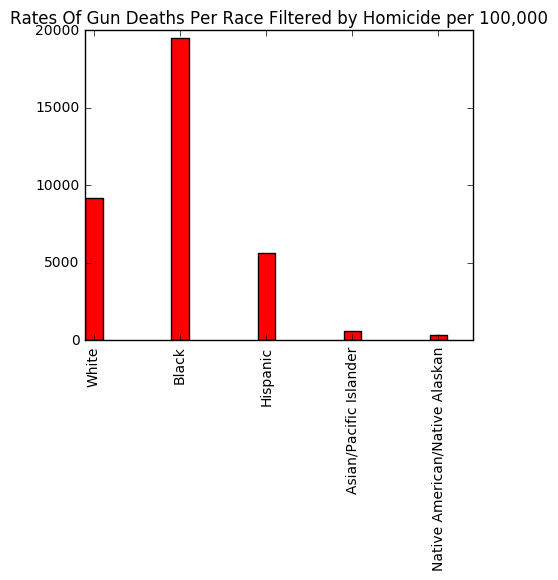

In [7]:
intents = [line[3] for line in data]
races = [line[7] for line in data]

homicide_race_per_hundredk = {}

for k,v in enumerate(races):
    if intents[k] == 'Homicide':
        if v not in homicide_race_per_hundredk:
            homicide_race_per_hundredk[v] = 1
        else:
            homicide_race_per_hundredk[v] += 1

fig = plt.figure(figsize=(5,4))

ax = fig.add_subplot(111)

ax.bar(left=list(range(1,len(homicide_race_per_hundredk)+1)),height=homicide_race_per_hundredk.values(),width=0.2,color='r')
ax.set_xticks([i+0.2/2 for i in range(1,len(homicide_race_per_hundredk)+1)])
ax.set_xticklabels(homicide_race_per_hundredk.keys(),rotation=90)
ax.set_title("Rates Of Gun Deaths Per Race Filtered by Homicide per 100,000")

plt.show()

#### Link, if any, between month and homicide rate.

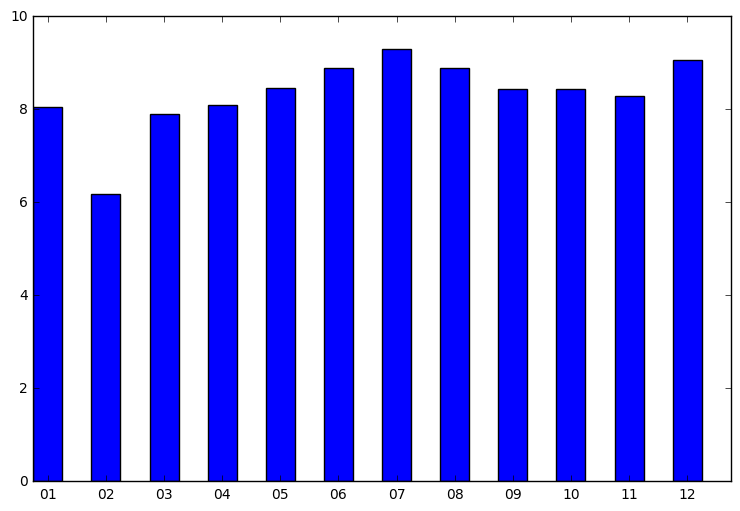

In [8]:
month_homicide = {}

total_homicide = 0

for line in data:
    if line[3] == 'Homicide':
        total_homicide += 1
        if line[2] not in month_homicide:
            month_homicide[line[2]] = 1
        else:
            month_homicide[line[2]] += 1
            
months = sorted(month_homicide.keys())

y = []
for m in months:
    y.append(month_homicide[m] / total_homicide * 100) 

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.set_xlim(0,12)    

ax.bar(left=range(0,12),height=y,width=.5)
ax.set_xticks([i+.25 for i in range(0,12)])
ax.set_xticklabels(months)

plt.show()


---
#### Homicide rate by gender.

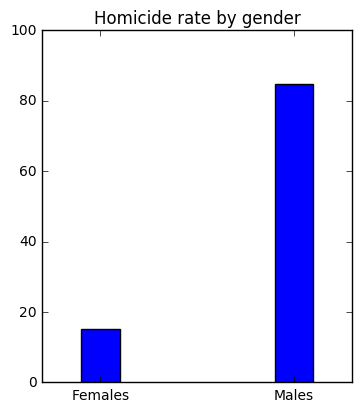

In [9]:
gender_homicide = {}

total_homicide = 0
    
for line in data:
    if line[3] == 'Homicide':
        total_homicide += 1
        if line[5] not in gender_homicide:
            gender_homicide[line[5]] = 1
        else:
            gender_homicide[line[5]] += 1

            
gender_homicide['F'] = (gender_homicide['F'] / total_homicide) * 100
gender_homicide['M'] = (gender_homicide['M'] / total_homicide) * 100

fig = plt.figure(figsize=(4,10))

ax1 = fig.add_subplot(211)

ax1.bar(left=[1,2],height=gender_homicide.values(),width=0.2)
ax1.set_ylim(0,100)
ax1.set_xticks([i+0.2/2 for i in (1,2)])
ax1.set_xticklabels(['Females', 'Males'])
ax1.set_title("Homicide rate by gender")

plt.show()

---
#### Gun death rates correlate to education

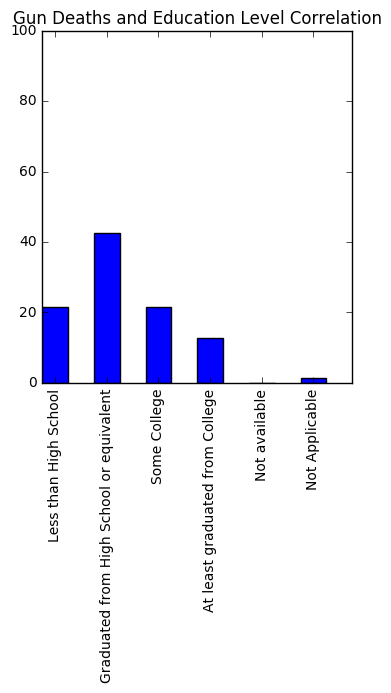

In [10]:
education_death_rate = {}

for line in data:
    if line[10] not in education_death_rate:
        education_death_rate[line[10]] = 1
    else:
        education_death_rate[line[10]] += 1

for k,v in education_death_rate.items():
    education_death_rate[k] = v / len(data) * 100
                
fig = plt.figure(figsize=(4,10))

ax1 = fig.add_subplot(211)
ax1.set_ylim(0,100)
ax1.bar(left=[1,2,3,4,5,6],height=education_death_rate.values(),width=0.5)
ax1.set_xticks([i+1.5/6 for i in (1,2,3,4,5,6)])
ax1.set_xticklabels(["Less than High School", "Graduated from High School or equivalent", "Some College",
                     "At least graduated from College","Not available","Not Applicable"],rotation=90)
ax1.set_title("Gun Deaths and Education Level Correlation")

plt.show()

---
#### Gun death rates correlate to location

In [11]:
places = set([line[9] for line in data])

places

{'Farm',
 'Home',
 'Industrial/construction',
 'NA',
 'Other specified',
 'Other unspecified',
 'Residential institution',
 'School/instiution',
 'Sports',
 'Street',
 'Trade/service area'}

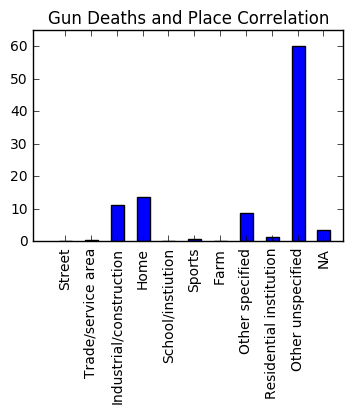

In [12]:
location_death_rate = {}

for line in data:
    if line[9] not in location_death_rate:
        location_death_rate[line[9]] = 1
    else:
        location_death_rate[line[9]] += 1

for k,v in location_death_rate.items():
    location_death_rate[k] = v / len(data) * 100
                
fig = plt.figure(figsize=(4,6))

ax1 = fig.add_subplot(211)
ax1.bar(left=[1,2,3,4,5,6,7,8,9,10,11],height=location_death_rate.values(),width=0.5)
ax1.set_ylim(0,65)
ax1.set_xticks([i+2.5/11 for i in (1,2,3,4,5,6,7,8,9,10,11)])
ax1.set_xticklabels(places,rotation=90)
ax1.set_title("Gun Deaths and Place Correlation")

plt.show()

---
---
### That's it!

Many more questions can be asked. Why don't you try it yourself?

Prepared by Issam Hijazi

https://ae.linkedin.com/in/ihijazi

@iHijazi